In [41]:
import pandas as pd
import numpy as np

In [42]:
# dataset imported from  kaggle
df = pd.read_csv('D:\Study\Data Science\MLOPS\Gemstone_Price_Prediction\dataset\cubic_zirconia.csv')
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [43]:
# checking the details of gemstone dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [44]:
# we do not need Unnamed column so we will drop it
df.drop('Unnamed: 0',axis=1, inplace= True)

In [45]:
# checking dataset info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


Description of each Columns in the dataset

Carat: 	 Carat weight of the cubic zirconia.

Cut: 	 Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

Color :  Colour of the cubic zirconia.With D being the best and J the worst.

Clarity: Cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

Depth: The Height of a cubic zirconia, measured from the Culet to the table, divided by its average 
Girdle Diameter.

Table: 	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

X:	 Length of the cubic zirconia in mm.

Y:	 Width of the cubic zirconia in mm.

Z:	 Height of the cubic zirconia in mm.

Price:	 the Price of the cubic zirconia.


In [46]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [47]:
df[df['depth'].isnull()]

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673
26854,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321
26879,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343
26923,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882


In [48]:
df.index[26]

26

In [49]:

df.describe(include = 'all')

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [50]:
df[df['price']==max(df.price)]

,carat,cut,color,clarity,depth,table,x,y,z,price
2590,2.0,Very Good,G,SI1,63.5,56.0,7.9,7.97,5.04,18818


In [51]:
df.sort_values('price',ascending=False).head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
2590,2.00,Very Good,G,SI1,63.5,56.0,7.90,7.97,5.04,18818
12687,2.07,Ideal,G,SI2,62.5,55.0,8.20,8.13,5.11,18804
2229,2.04,Premium,H,SI1,58.1,60.0,8.37,8.28,4.84,18795
17892,2.00,Premium,I,VS1,60.8,59.0,8.13,8.02,4.91,18795
16007,1.71,Premium,F,VS2,62.3,59.0,7.57,7.53,4.70,18791
25141,2.05,Ideal,G,SI1,61.9,57.0,8.10,8.16,5.03,18787
7284,1.60,Ideal,F,VS1,62.0,56.0,7.47,7.52,4.65,18780
24952,2.55,Premium,I,VS1,61.8,62.0,8.70,8.65,5.36,18766
17415,2.08,Ideal,H,SI1,58.7,60.0,8.36,8.40,4.92,18760
22467,2.00,Very Good,F,SI1,57.9,60.0,8.28,8.34,4.81,18759


In [52]:
df.groupby('carat').count().sort_values('price',ascending=False)

,cut,color,clarity,depth,table,x,y,z,price
carat,,,,,,,,,
0.30,1331,1331,1331,1300,1331,1331,1331,1331,1331
0.31,1118,1118,1118,1091,1118,1118,1118,1118,1118
1.01,1111,1111,1111,1091,1111,1111,1111,1111,1111
0.70,959,959,959,936,959,959,959,959,959
0.32,950,950,950,919,950,950,950,950,950
...,...,...,...,...,...,...,...,...,...
1.88,1,1,1,1,1,1,1,1,1
1.89,1,1,1,1,1,1,1,1,1
1.94,1,1,1,1,1,1,1,1,1


In [53]:
df.color.unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [54]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [55]:
# To check if we have duplicate records in the dataset, based on all the independent features we have in the group
df[df.duplicated(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'])]

,carat,cut,color,clarity,depth,table,x,y,z,price
2556,0.53,Ideal,G,VVS2,60.4,56.0,5.29,5.24,3.18,2051
2931,0.31,Ideal,E,VVS1,61.3,56.0,4.38,4.40,2.69,865
3895,1.20,Ideal,G,VVS1,61.2,56.0,6.89,6.86,4.21,9570
4200,0.31,Ideal,F,IF,61.2,57.0,4.35,4.38,2.67,1818
4259,1.50,Very Good,G,SI2,63.1,57.0,7.29,7.25,4.59,9384
...,...,...,...,...,...,...,...,...,...,...
26191,2.54,Very Good,H,SI2,63.5,56.0,8.68,8.65,5.50,16353
26315,0.52,Ideal,D,VS2,62.1,57.0,5.13,5.17,3.20,1689
26530,0.41,Ideal,G,IF,61.7,56.0,4.77,4.80,2.95,1367
26653,0.55,Ideal,H,SI1,61.5,54.0,5.30,5.33,3.27,1134


In [56]:
# Check the counts of duplicates based on all the independent features we have in the group
df[df.duplicated(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'])].shape

(88, 10)

In [57]:
# Drop the duplicates
df= df.drop_duplicates(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], keep = 'first')

In [58]:
# Check to see if any duplicates are remaining
df[df.duplicated(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'])].shape

(0, 10)

In [59]:
df.sort_values(by = ['carat','color'],ascending= [False,True])

,carat,cut,color,clarity,depth,table,x,y,z,price
12500,4.50,Fair,J,I1,65.8,58.0,10.23,10.16,6.72,18531
20505,4.01,Premium,I,I1,61.0,61.0,10.14,10.10,6.17,15223
3025,4.01,Premium,J,I1,62.5,62.0,10.02,9.94,6.24,15223
8156,4.00,Very Good,I,I1,63.3,58.0,10.01,9.94,6.31,15984
15080,3.51,Premium,J,VS2,62.5,59.0,9.66,9.63,6.03,18701
...,...,...,...,...,...,...,...,...,...,...
10375,0.20,Premium,E,SI2,NaN,62.0,3.79,3.75,2.27,345
12748,0.20,Premium,E,VS2,59.8,62.0,3.79,3.77,2.26,367
17559,0.20,Premium,E,VS2,59.7,62.0,3.84,3.80,2.28,367
25498,0.20,Premium,E,VS2,59.0,60.0,3.81,3.78,2.24,367


In [60]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

We have 3 categorical features : ['cut', 'color', 'clarity']


In [61]:
df[numeric_features]

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,61.8,56.0,4.19,4.20,2.60,682


In [62]:
df[categorical_features]

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
...,...,...,...
26962,Premium,G,SI1
26963,Ideal,H,IF
26964,Premium,E,VS2
26965,Very Good,F,VVS2


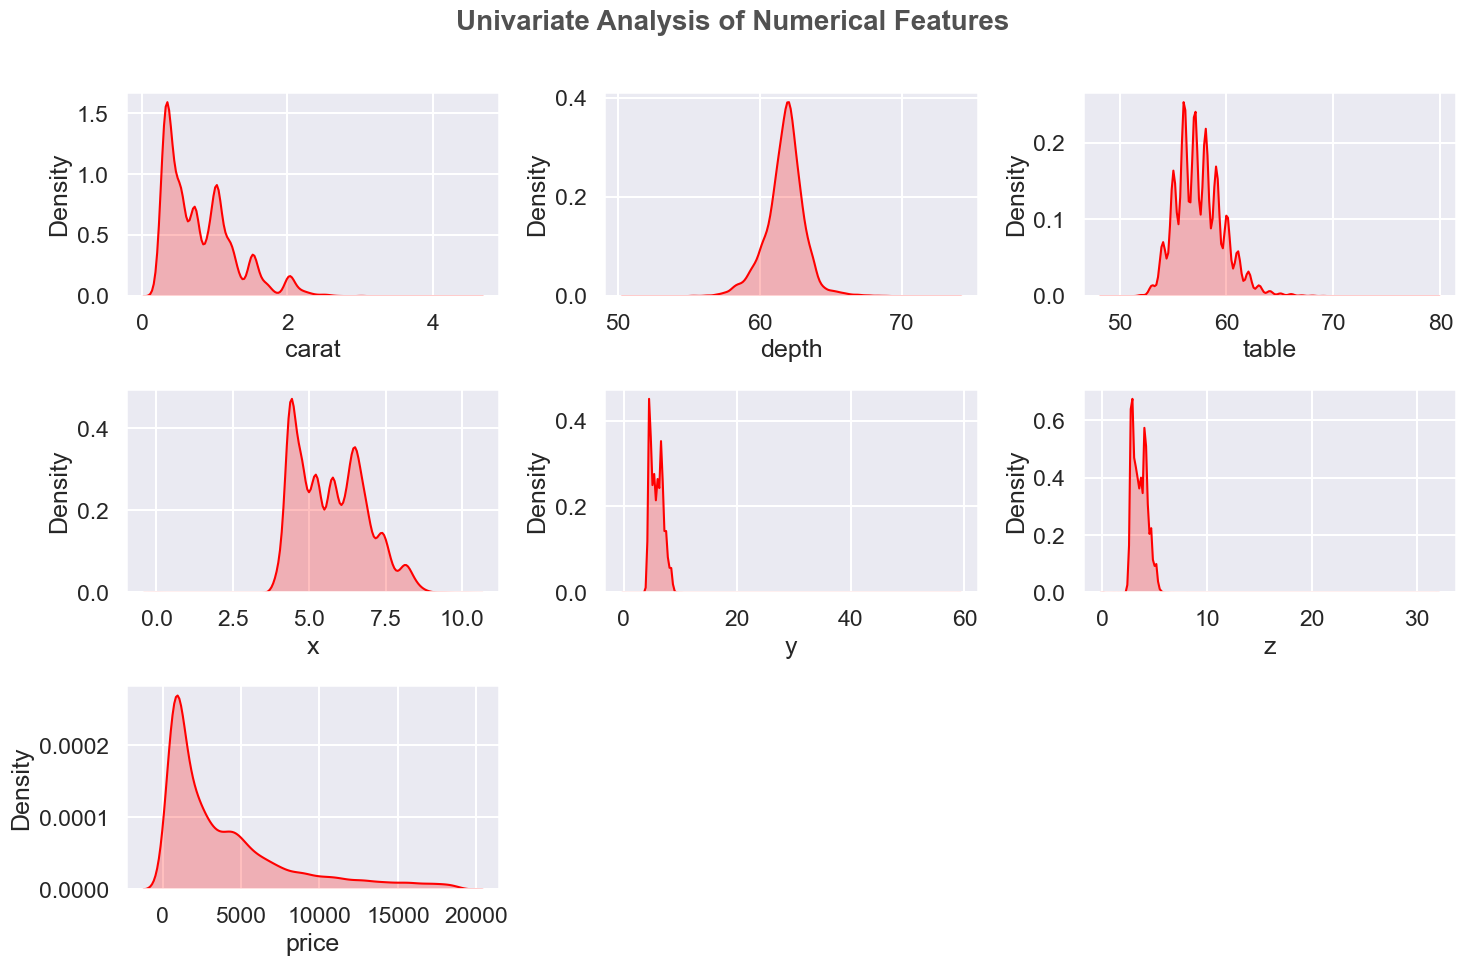

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
warnings.filterwarnings("ignore")
%matplotlib inline

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

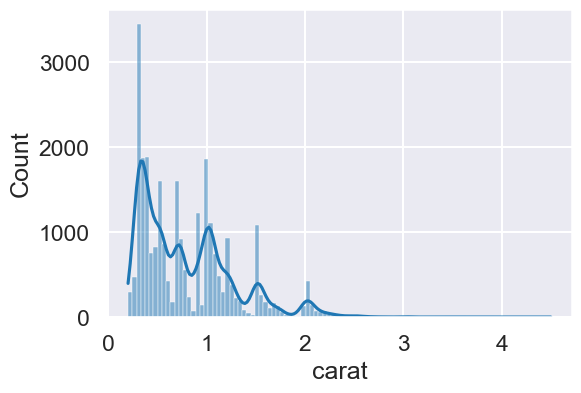

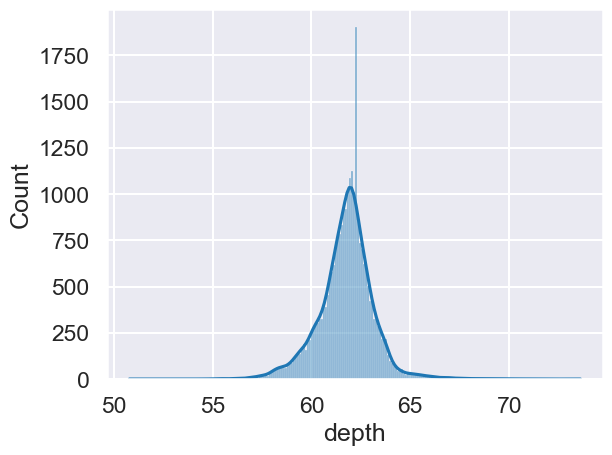

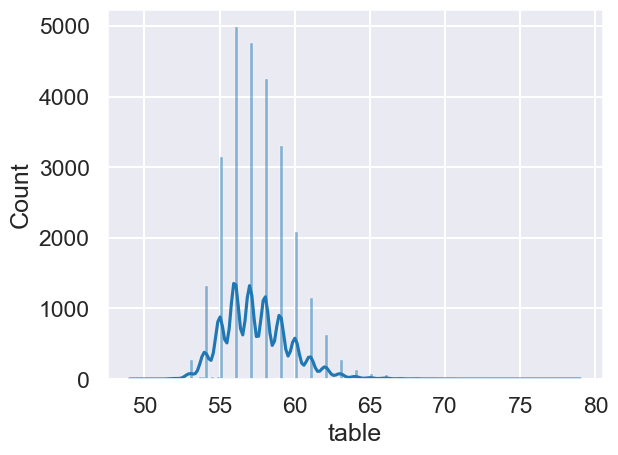

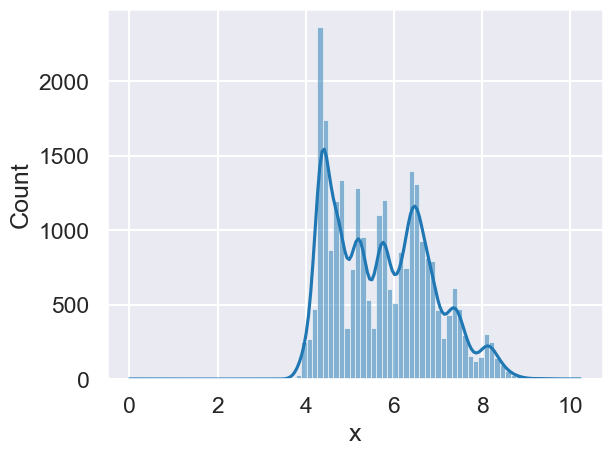

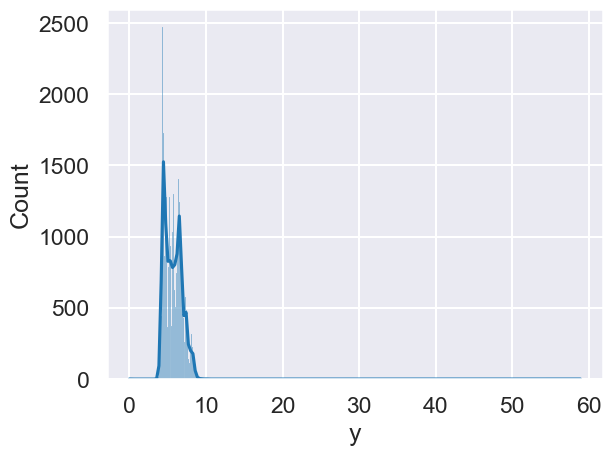

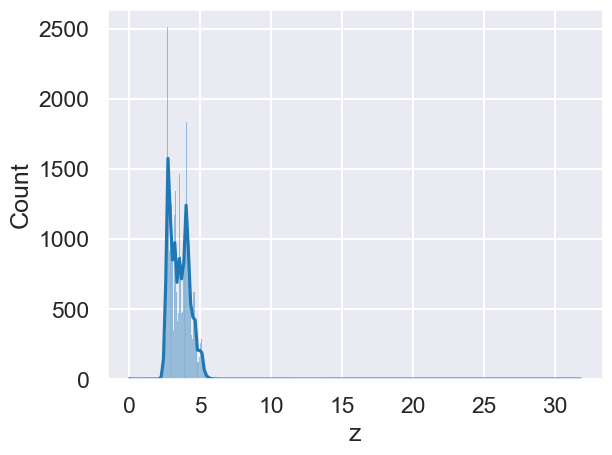

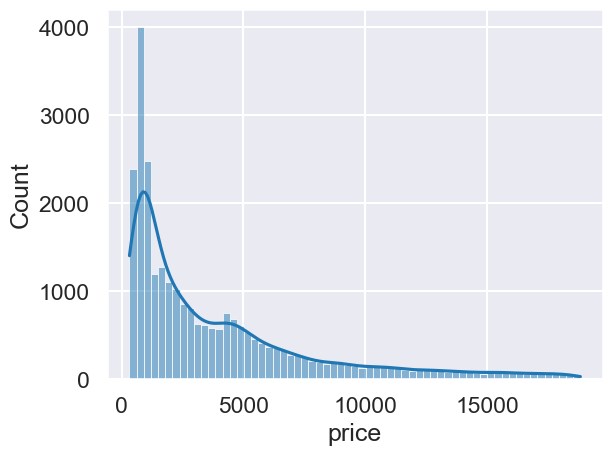

In [64]:
plt.figure(figsize=(6,4))

for col in numeric_features:
    sns.histplot(data=df, x= col ,kde = True)
    print("\n")
    plt.show()


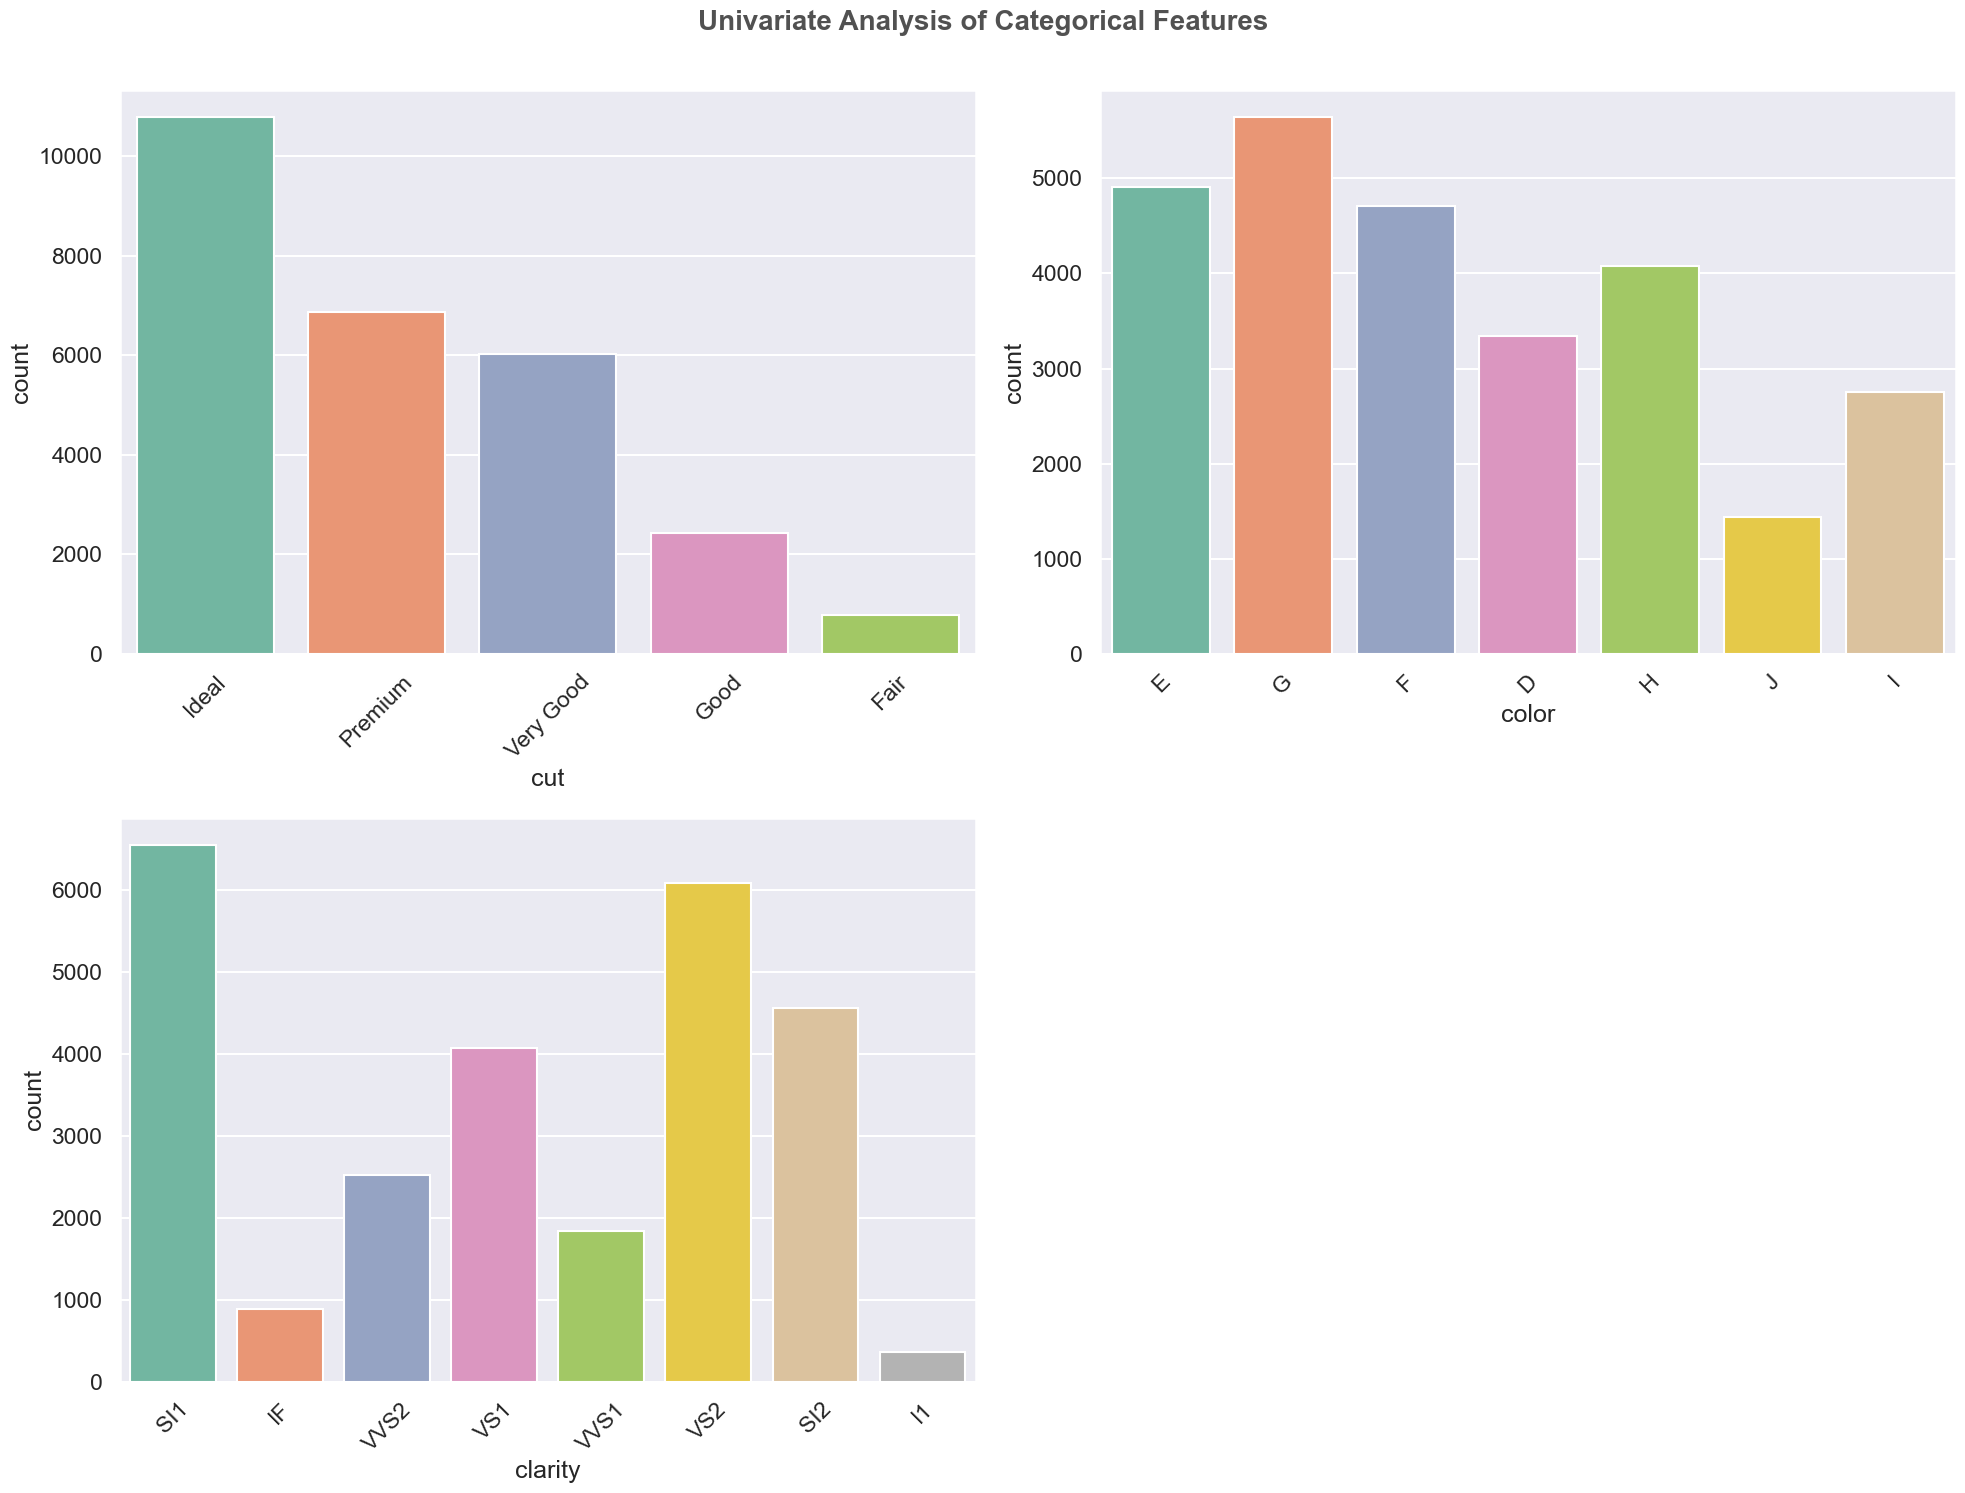

In [65]:

# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
categorical_features
for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[categorical_features[i]],palette="Set2")
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

<Axes: title={'center': 'Distribution of gemstone by clarity'}>

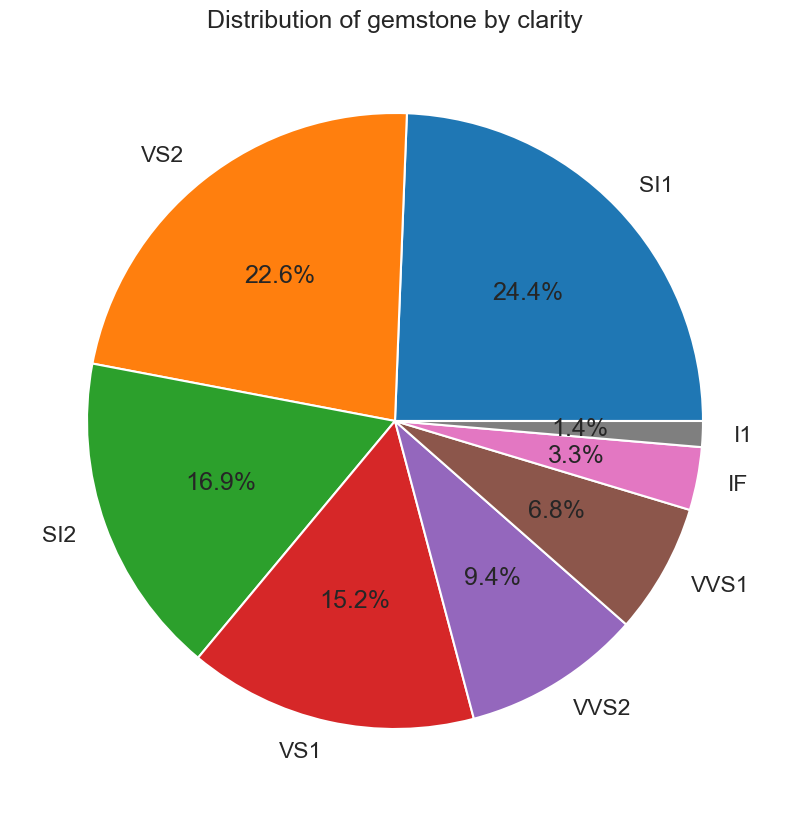

In [66]:
# Piechart
df['clarity'].value_counts().plot.pie(y = df['clarity'], figsize = (10, 10), label = '', autopct = '%1.1f%%', title = 'Distribution of gemstone by clarity', )

<Axes: >

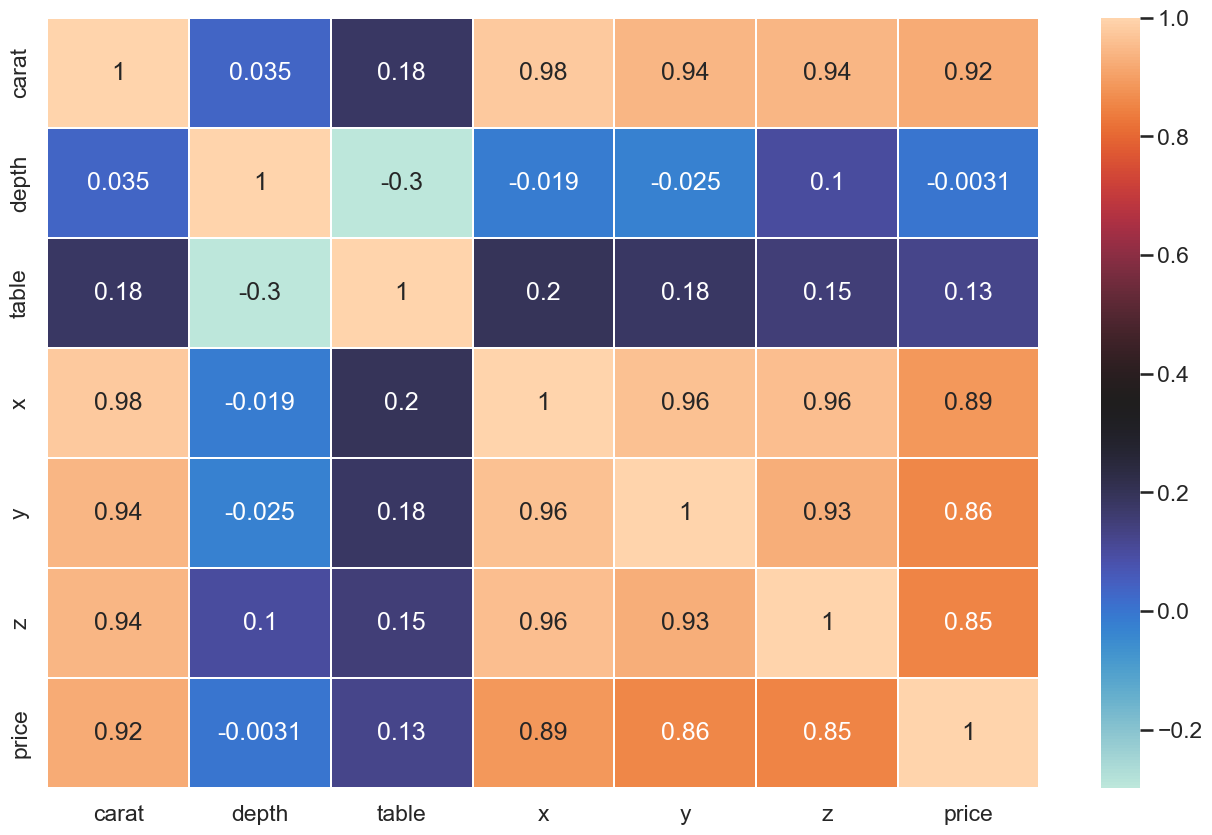

In [67]:
# Plotting heatmap using numeric_features
plt.figure(figsize=(16,10))
sns.heatmap(df[numeric_features].corr(),annot=True,cmap='icefire',linewidths=0.2)

In [68]:

category = pd.DataFrame(df['clarity'].value_counts())
category

,count
clarity,
SI1,6554
VS2,6083
SI2,4554
VS1,4076
VVS2,2525
VVS1,1834
IF,889
I1,364


In [69]:
df1= df.groupby(['cut','color'])['carat'].count().sort_values(ascending = False).reset_index()
df1

,cut,color,carat
0,Ideal,G,2458
1,Ideal,E,1964
2,Ideal,F,1887
3,Ideal,H,1547
4,Premium,G,1469
5,Ideal,D,1408
6,Very Good,E,1185
7,Premium,E,1173
8,Premium,F,1163
9,Premium,H,1153


Text(0.5, 1.0, 'Most Popular Cut in Gemstone')

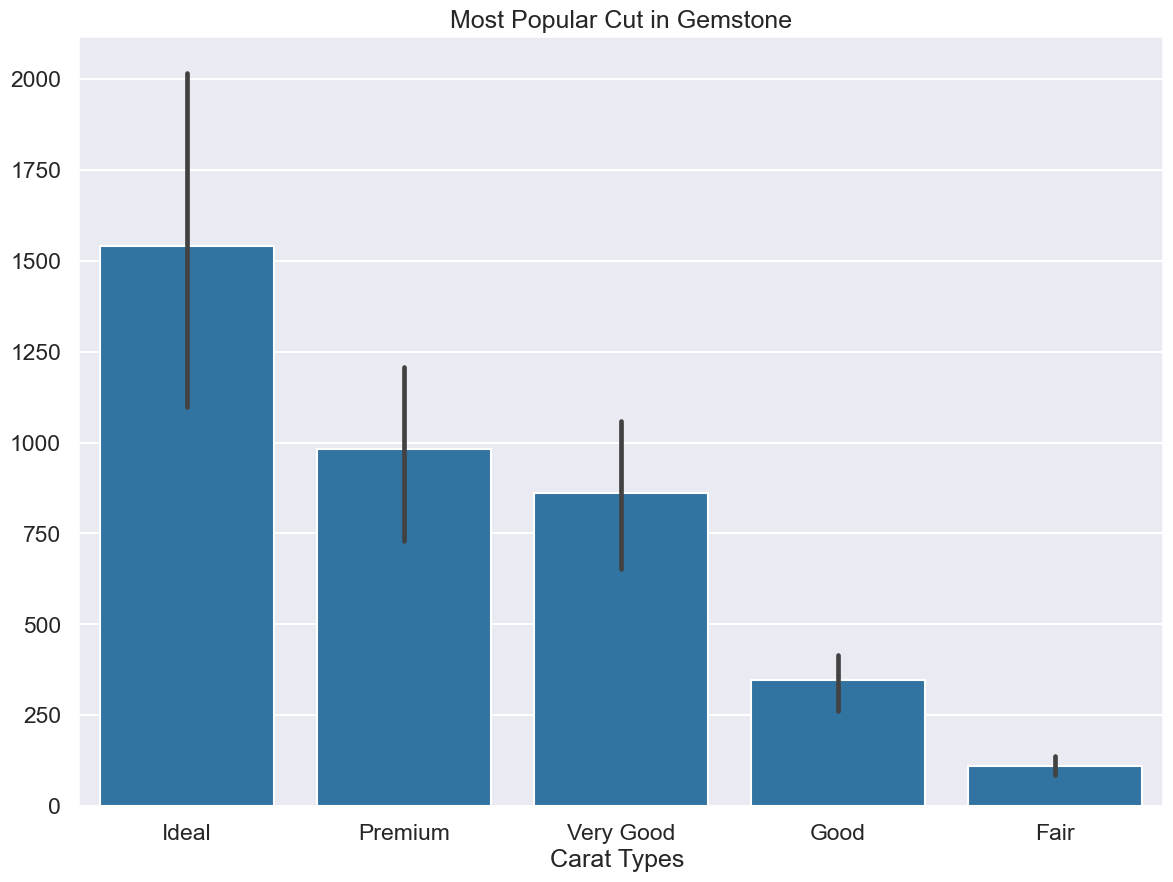

In [70]:
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")
ax = sns.barplot(x = 'cut' , y = 'carat' , data = df1 )
ax.set_xlabel('Carat Types ')
ax.set_ylabel('')
ax.set_title("Most Popular Cut in Gemstone")

In [71]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [72]:
df.to_csv('df_clean.csv', index = False)

Encoding of Categorical Variables

In [73]:
df['cut'].value_counts()

cut
Ideal        10786
Premium       6868
Very Good     6020
Good          2425
Fair           780
Name: count, dtype: int64

In [74]:
df_cut_types = {"Fair": 1,"Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
df['cut']= df['cut'].map(df_cut_types)
df['cut']

0        5
1        4
2        3
3        5
4        5
        ..
26962    4
26963    5
26964    4
26965    3
26966    4
Name: cut, Length: 26879, dtype: int64

In [75]:
df['color'].value_counts()

color
G    5644
E    4909
F    4712
H    4082
D    3338
I    2757
J    1437
Name: count, dtype: int64

In [76]:
df_color_types = {"D": 1,"E": 2, "F": 3, "G": 4, "H": 5, "I":6, "J": 7}
df['color']= df['color'].map(df_color_types)
df['color'].value_counts()

color
4    5644
2    4909
3    4712
5    4082
1    3338
6    2757
7    1437
Name: count, dtype: int64

In [77]:
df['clarity'].value_counts()

clarity
SI1     6554
VS2     6083
SI2     4554
VS1     4076
VVS2    2525
VVS1    1834
IF       889
I1       364
Name: count, dtype: int64

In [78]:
df_clarity_types = {"I1": 1,"IF": 2, "SI1": 3, "SI2": 4, "VS1": 5, "VS2":6, "VVS1": 7,"VVS2": 8}
df['clarity']= df['clarity'].map(df_clarity_types)
df['clarity'].value_counts()

clarity
3    6554
6    6083
4    4554
5    4076
8    2525
7    1834
2     889
1     364
Name: count, dtype: int64

In [79]:
# saving data on which EDA and Feature engieering was performed  as df_data
df.to_csv('df_clean_updated.csv', index = False)